**Fonctions principales :**

1. **load_dataset(csv_file)** :
   - Cette fonction charge l'ensemble de données à partir d'un fichier CSV spécifié et retourne un DataFrame Pandas contenant les données.

2. **split_train_dev_test(data, train_size=0.7, dev_size=0.15, random_state=42)** :
   - Cette fonction divise l'ensemble de données en ensembles d'entraînement, de validation et de test selon les proportions spécifiées. Par défaut, 70% des données sont attribuées à l'ensemble d'entraînement, 15% à l'ensemble de validation et 15% à l'ensemble de test.

3. **plot_dataset_distribution(data, label_column="labels")** :
   - Cette fonction génère un graphique de distribution des étiquettes dans l'ensemble de données pour visualiser la répartition des langues.

4. **evaluate_model(train_data, dev_data, test_data, text_column="text", label_column="labels")** :
   - Cette fonction entraîne un modèle d'identification de la langue en utilisant l'ensemble d'entraînement et évalue ses performances sur les ensembles de validation et de test. Elle génère également des rapports de classification pour l'ensemble de validation et l'ensemble de test, ainsi qu'une matrice de confusion pour l'ensemble de test.

Après avoir chargé l'ensemble de données, divisé les données en ensembles d'entraînement, de validation et de test, et évalué le modèle, le notebook génère des rapports de classification pour évaluer les performances du modèle et visualise la matrice de confusion pour mieux comprendre les prédictions du modèle sur l'ensemble de test.

In [11]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import langid

In [13]:
def load_dataset(csv_file):
    """
    Charge l'ensemble de données à partir d'un fichier CSV.

    Args:
    - csv_file (str): Chemin vers le fichier CSV.

    Returns:
    - DataFrame: L'ensemble de données chargé.
    """
    return pd.read_csv(csv_file)

In [14]:
def split_train_dev_test(data, train_size=0.7, dev_size=0.15, random_state=42):
    """
    Divise l'ensemble de données en ensembles d'entraînement, de validation et de test.

    Args:
    - data (DataFrame): Le DataFrame contenant l'ensemble de données.
    - train_size (float): La proportion de l'ensemble d'entraînement.
    - dev_size (float): La proportion de l'ensemble de validation.
    - random_state (int): La graine aléatoire pour la reproductibilité.

    Returns:
    - DataFrame, DataFrame, DataFrame: Ensembles d'entraînement, de validation et de test.
    """
    train_data, dev_test_data = train_test_split(data, train_size=train_size, random_state=random_state)
    dev_proportion = dev_size / (1.0 - train_size)
    dev_data, test_data = train_test_split(dev_test_data, train_size=dev_proportion, random_state=random_state)
    return train_data, dev_data, test_data

In [15]:
def plot_dataset_distribution(data, label_column="labels"):
    """
    Trace la distribution des étiquettes dans l'ensemble de données.

    Args:
    - data (DataFrame): Le DataFrame contenant l'ensemble de données.
    - label_column (str): Le nom de la colonne contenant les étiquettes.
    """
    plt.figure(figsize=(10, 6))
    sns.countplot(data[label_column])
    plt.title("Distribution de l'ensemble de données")
    plt.xlabel("Langue")
    plt.ylabel("Fréquence")
    plt.show()

In [16]:
def evaluate_model(train_data, dev_data, test_data, text_column="text", label_column="labels"):
    """
    Entraîne et évalue un modèle d'identification de la langue.

    Args:
    - train_data (DataFrame): L'ensemble d'entraînement.
    - dev_data (DataFrame): L'ensemble de validation.
    - test_data (DataFrame): L'ensemble de test.
    - text_column (str): Le nom de la colonne contenant le texte.
    - label_column (str): Le nom de la colonne contenant les étiquettes.
    """
    langid.set_languages(train_data[label_column].unique())

    dev_predictions = dev_data[text_column].apply(lambda x: langid.classify(x)[0])
    test_predictions = test_data[text_column].apply(lambda x: langid.classify(x)[0])

    # Créer des répertoires s'ils n'existent pas
    os.makedirs("txt", exist_ok=True)
    os.makedirs("./results/IMAGES/dataset", exist_ok=True)

    # Enregistrer les rapports de classification dans des fichiers texte
    with open("txt/dev_classification_report.txt", "w") as f:
        f.write("Métriques d'évaluation pour l'ensemble de validation:\n")
        f.write(classification_report(dev_data[label_column], dev_predictions))

    with open("txt/test_classification_report.txt", "w") as f:
        f.write("Métriques d'évaluation pour l'ensemble de test:\n")
        f.write(classification_report(test_data[label_column], test_predictions))

    # Afficher les rapports de classification
    print("Métriques d'évaluation pour l'ensemble de validation:")
    print(classification_report(dev_data[label_column], dev_predictions))

    print("\nMétriques d'évaluation pour l'ensemble de test:")
    print(classification_report(test_data[label_column], test_predictions))

    # Tracer la matrice de confusion
    plt.figure(figsize=(10, 7))
    sns.heatmap(confusion_matrix(test_data[label_column], test_predictions, normalize="true"),
                annot=True, fmt=".1f", xticklabels=test_data[label_column].unique(),
                yticklabels=test_data[label_column].unique(), cmap="Blues")
    plt.title("Matrice de confusion (Ensemble de test)")
    plt.xlabel("Langue prédite")
    plt.ylabel("Langue réelle")
    plt.savefig("./results/IMAGES/dataset/confusion_matrix.png", facecolor="white", bbox_inches="tight")
    plt.show()

In [17]:
# Paths
csv_file = "../data/clean/results/CSV/result.csv"

# Load dataset
data = load_dataset(csv_file)

# Split dataset
train_data, dev_data, test_data = split_train_dev_test(data)

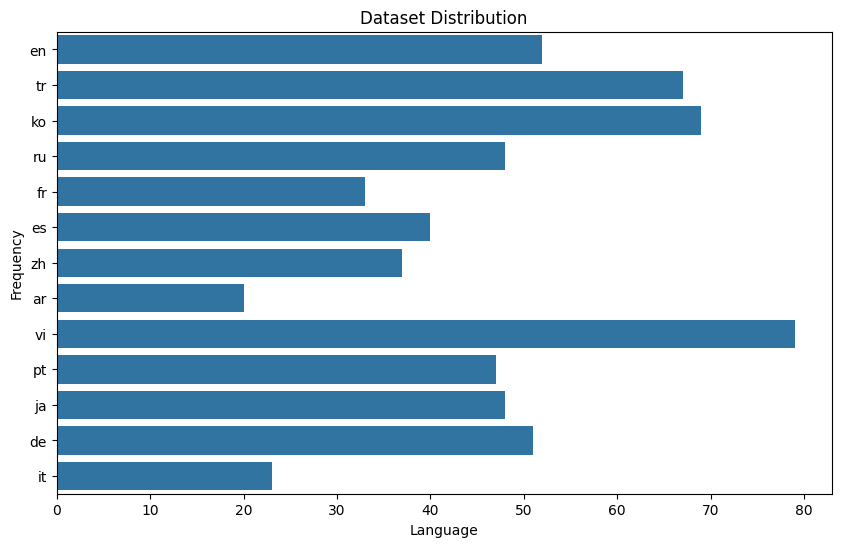

In [18]:
# Plot dataset distribution
plot_dataset_distribution(data)

Evaluation Metrics for Development Set:
              precision    recall  f1-score   support

          ar       1.00      1.00      1.00         1
          de       1.00      0.80      0.89         5
          en       1.00      1.00      1.00         3
          es       1.00      1.00      1.00         4
          fr       1.00      1.00      1.00         6
          it       1.00      1.00      1.00         2
          ja       1.00      1.00      1.00        10
          ko       1.00      1.00      1.00        14
          pt       0.92      1.00      0.96        11
          ru       1.00      1.00      1.00         7
          tr       1.00      1.00      1.00         9
          vi       1.00      1.00      1.00        15
          zh       1.00      1.00      1.00         5

    accuracy                           0.99        92
   macro avg       0.99      0.98      0.99        92
weighted avg       0.99      0.99      0.99        92


Evaluation Metrics for Test Set:
     

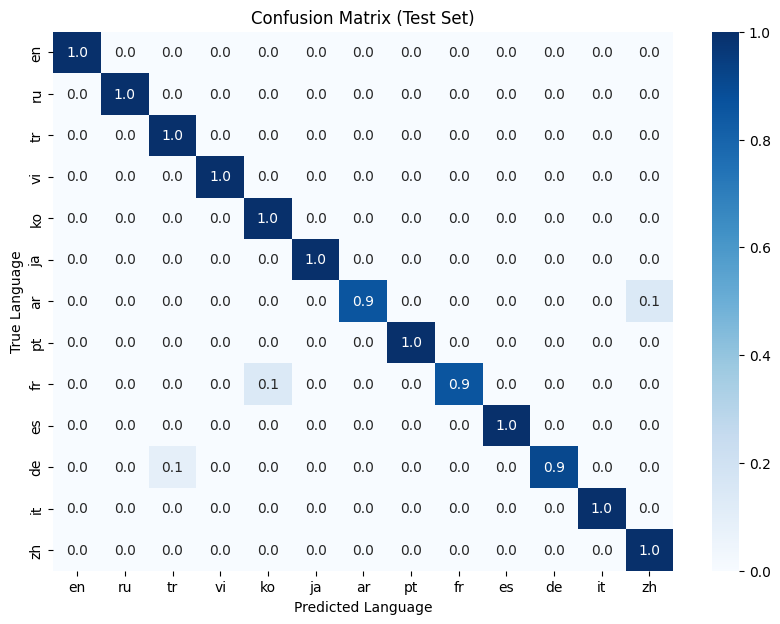

In [19]:
# Evaluate model
evaluate_model(train_data, dev_data, test_data)

Precision (précision) : Cela mesure la proportion d'éléments identifiés correctement parmi ceux qui ont été classés comme appartenant à une certaine classe. Par exemple, pour la classe "fr" (français) dans l'ensemble de développement, la précision est de 1.00, ce qui signifie que tous les éléments classés comme français étaient effectivement français.

Recall (rappel) : Il mesure la proportion d'éléments appartenant à une certaine classe qui ont été correctement identifiés par le modèle. Par exemple, pour la classe "pt" (portugais) dans l'ensemble de test, le rappel est de 1.00, ce qui signifie que tous les éléments réels portugais ont été correctement identifiés.

F1-score : Il est calculé comme la moyenne harmonique de la précision et du rappel. C'est une mesure qui combine à la fois la précision et le rappel en un seul nombre. Il est particulièrement utile lorsque les classes sont déséquilibrées.

Accuracy (exactitude) : C'est la proportion d'éléments correctement classés parmi l'ensemble des éléments. Par exemple, dans l'ensemble de développement, l'exactitude est de 0.99, ce qui indique que 99% des langues ont été correctement identifiées.

Ces statistiques sont importantes car elles fournissent une évaluation détaillée des performances du modèle d'identification de la langue sur les ensembles de développement et de test. Elles permettent de comprendre à quel point le modèle est précis dans ses prédictions pour chaque classe de langue. Une précision élevée, un rappel élevé et un score F1 élevé indiquent généralement un modèle performant. En outre, l'exactitude globale du modèle donne une indication générale de ses performances globales.

La matrice de confusion est un outil visuel qui résume les performances d'un modèle de classification. Elle montre le nombre de prédictions correctes et incorrectes effectuées par le modèle pour chaque classe. Dans ce cas, nous avons une matrice de confusion pour l'ensemble de test.

Dans la matrice de confusion fournie, les nombres situés en diagonale représentent les prédictions correctes, tandis que les nombres hors de la diagonale représentent les prédictions incorrectes. Chaque ligne correspond à la classe réelle, tandis que chaque colonne correspond à la classe prédite par le modèle.

Dans cette matrice, la plupart des classes ont une précision de 1.0, ce qui signifie que le modèle a correctement identifié la grande majorité des exemples pour ces classes. Cependant, les classes "ar" (arabe), "fr" (français) et "de" (allemand) ont une précision légèrement inférieure de 0.9. Cela signifie que pour ces langues, le modèle a identifié environ 90% des exemples correctement, mais a fait quelques erreurs dans la classification.

Une précision légèrement inférieure pour certaines langues peut indiquer que le modèle rencontre des difficultés à distinguer ces langues spécifiques, peut-être en raison de similitudes dans la structure linguistique ou de données d'entraînement limitées pour ces langues. Cela pourrait nécessiter un examen plus approfondi pour comprendre les raisons sous-jacentes et améliorer les performances du modèle pour ces langues spécifiques.

### Conclusion

L'évaluation du corpus de classification de langues a révélé des performances globalement élevées, avec des scores de précision, de rappel et de f-score proches de 1 pour la plupart des langues. Cela suggère que le modèle de classification est capable d'identifier correctement la langue dans laquelle un texte est écrit dans la grande majorité des cas.

Cependant, des différences de performance ont été observées pour certaines langues, notamment l'arabe, le français et l'allemand, pour lesquelles la précision était légèrement inférieure, bien que toujours élevée.

La matrice de confusion a fourni des informations supplémentaires sur les performances du modèle en identifiant les classes pour lesquelles il avait le plus de difficultés. Dans ce cas, l'arabe, le français et l'allemand ont été identifiés comme des langues pour lesquelles le modèle a fait quelques erreurs de classification.

En conclusion, bien que le modèle présente des performances globalement élevées, des améliorations pourraient être apportées pour renforcer sa capacité à distinguer certaines langues spécifiques. Cela pourrait être réalisé en utilisant des données d'entraînement supplémentaires pour ces langues, en ajustant les hyperparamètres du modèle ou en explorant d'autres architectures de modèle de classification de langues.